<h1>Function Transformer</h1>

In [3]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   --------- ----------------------------- 71.7/294.9 kB 558.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 595.3 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 654.6 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 808.4 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 883.3 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 867.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats  #for QQ plot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer




In [4]:
df = pd.read_csv('train.csv' , usecols=['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\gaurav gupta\AppData\Local\Temp\ipykernel_19700\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Survived' , axis=1) , df['Survived'] , test_size=0.2 , random_state=50)

Text(0.5, 1.0, 'Age PDF')

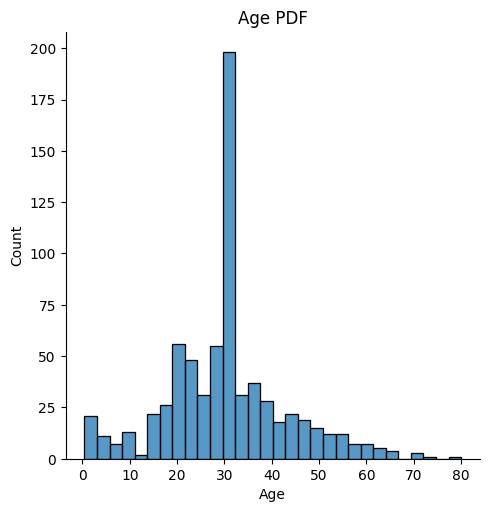

In [9]:
# plt.figure(figsize=(14,4))
# plt.subplot(121)
sns.displot(X_train['Age'])
plt.title('Age PDF')

# plt.subplot(122)
# stats.probplot(X_train['Age'] , dist='norm' , plot=plt)
# plt.title('Age QQ Plot')

# plt.show()

Text(0.5, 1.0, 'Age QQ plot')

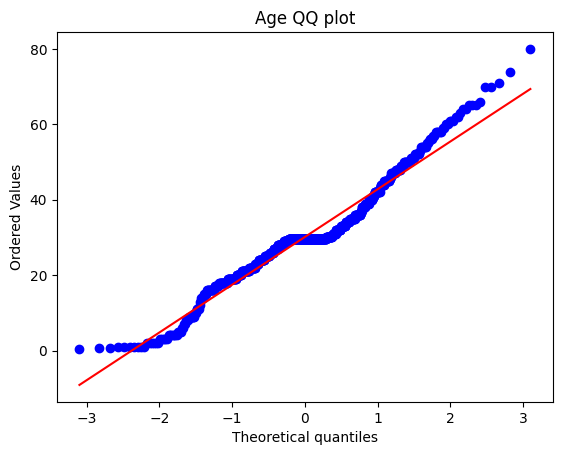

In [10]:
stats.probplot(X_train['Age'] , dist='norm' , plot=plt)
plt.title('Age QQ plot')

Text(0.5, 1.0, 'Fare PDF')

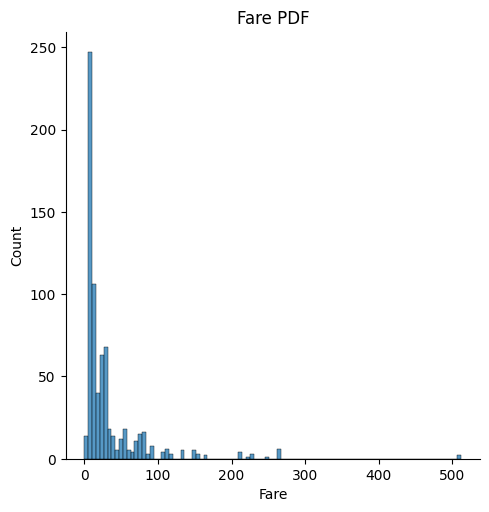

In [11]:
sns.displot(X_train['Fare'])
plt.title('Fare PDF')

Text(0.5, 1.0, 'Fare QQ Plot')

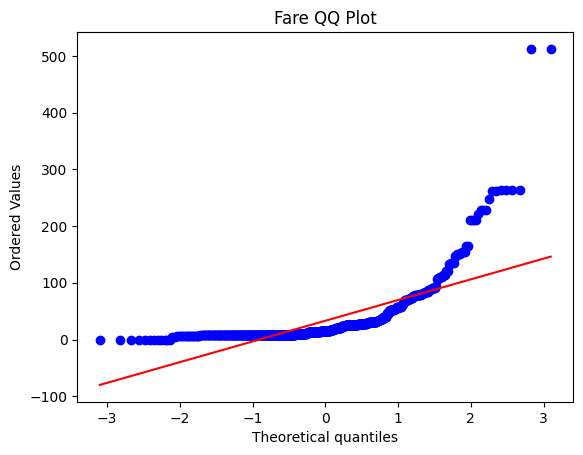

In [12]:
stats.probplot(X_train['Fare'] , dist='norm' , plot=plt)
plt.title('Fare QQ Plot')

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [14]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)



DecisionTreeClassifier()

In [15]:
Y_pred1 = clf.predict(X_test)
Y_pred2 = clf2.predict(X_test)

In [16]:
ac1 = accuracy_score(Y_test , Y_pred1)
print('LR : ',ac1)


LR :  0.6201117318435754


In [17]:
ac2 = accuracy_score(Y_test,Y_pred2)
print('DT : ',ac2)

DT :  0.6256983240223464


In [18]:
trf = FunctionTransformer(func=np.log1p)

In [19]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [21]:
clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

DecisionTreeClassifier()

In [22]:
y_pred1 = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

In [23]:
ac1 = accuracy_score(Y_test , y_pred1)
print('LR : ',ac1)


LR :  0.6536312849162011


In [24]:
ac2 = accuracy_score(Y_test,y_pred2)
print('DT : ',ac2)

DT :  0.6312849162011173


In [28]:
X = df.iloc[:,1:3]
Y = df.iloc[:,0]

In [26]:
X_transformed = trf.fit_transform(X)

In [27]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [29]:
print('LR : ', np.mean(cross_val_score(clf , X_transformed,Y,scoring='accuracy',cv=10)))
print('DT : ', np.mean(cross_val_score(clf2 , X_transformed,Y,scoring='accuracy',cv=10)))

LR :  0.678027465667915
DT :  0.6543445692883896


Text(0.5, 1.0, 'Age before log transformation')

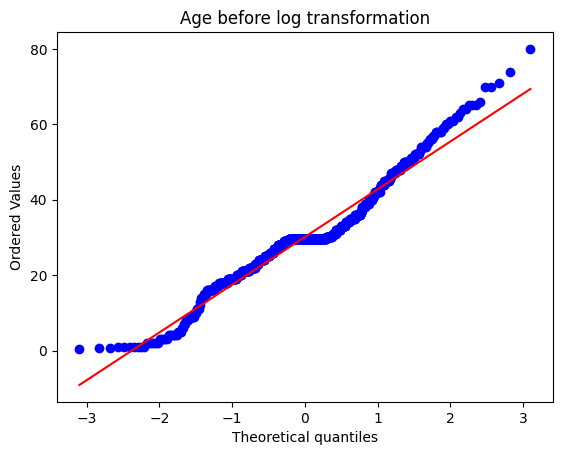

In [30]:
stats.probplot(X_train['Age'] , dist='norm' , plot = plt)
plt.title('Age before log transformation')


Text(0.5, 1.0, 'Age after transformation')

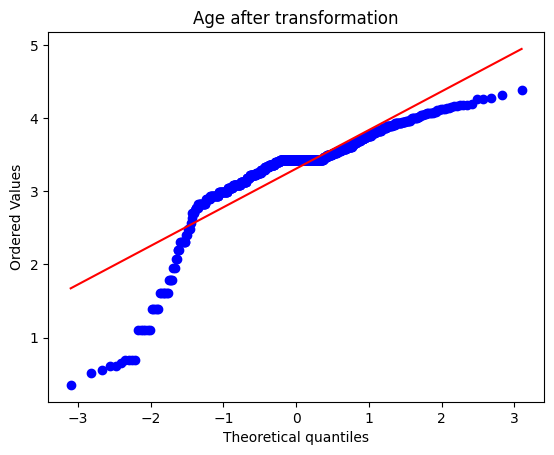

In [31]:
stats.probplot(X_train_transformed['Age'] , dist='norm' , plot=plt)
plt.title('Age after transformation')

Text(0.5, 1.0, 'Fare before log transformation')

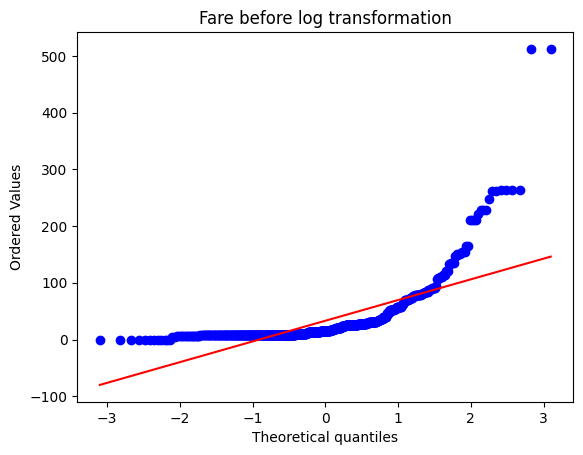

In [32]:
stats.probplot(X_train['Fare'] , dist='norm' , plot = plt)
plt.title('Fare before log transformation')


Text(0.5, 1.0, 'Fare after log transformation')

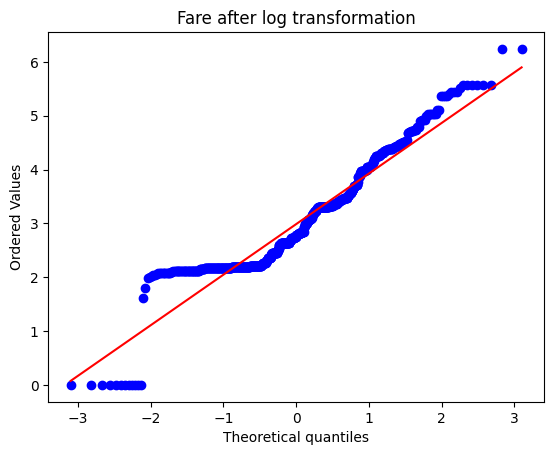

In [33]:
stats.probplot(X_train_transformed['Fare'] , dist='norm' , plot = plt)
plt.title('Fare after log transformation')


In [34]:
trf2 = ColumnTransformer([
    ('log' , FunctionTransformer(np.log1p) , ['Fare'])
],remainder='passthrough')

In [35]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [36]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [37]:
clf.fit(X_train_transformed2,Y_train)
clf2.fit(X_train_transformed2,Y_train)

DecisionTreeClassifier()

In [40]:
Y_pred1 = clf.predict(X_test_transformed2)
Y_pred2 = clf2.predict(X_test_transformed2)

In [41]:
print('LR : ',accuracy_score(Y_test,Y_pred1))
print('DT : ',accuracy_score(Y_test,Y_pred2))


LR :  0.6256983240223464
DT :  0.6201117318435754


In [51]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    Y = df.iloc[:,0]

    trf = ColumnTransformer([
        ('log',FunctionTransformer(transform),['Fare'])
    ],remainder='passthrough')

    X_transformed = trf.fit_transform(X)

    clf = LogisticRegression()

    print('Accuracy LR : ',np.mean(cross_val_score(clf,X_transformed,Y,scoring='accuracy',cv=10)))

    plt.subplot(121)
    stats.probplot(X['Fare'] , dist='norm' , plot=plt)
    plt.title('Fare before transformation')


    plt.subplot(122)
    stats.probplot(X_transformed[:,0] , dist='norm' , plot=plt)
    plt.title('Fare after transformation')

    plt.show()


Accuracy LR :  0.6589013732833957


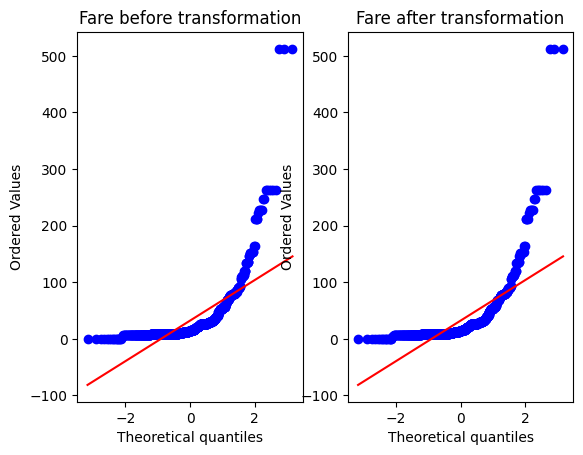

In [52]:
apply_transform(lambda x: x)

Accuracy LR :  0.6431335830212235


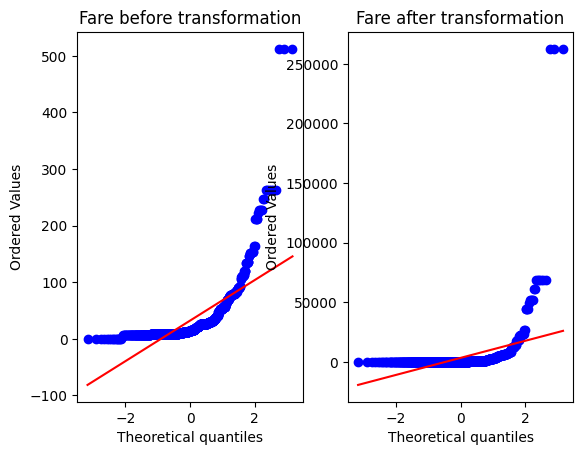

In [53]:
apply_transform(lambda x: x**2)

Accuracy LR :  0.6589013732833957


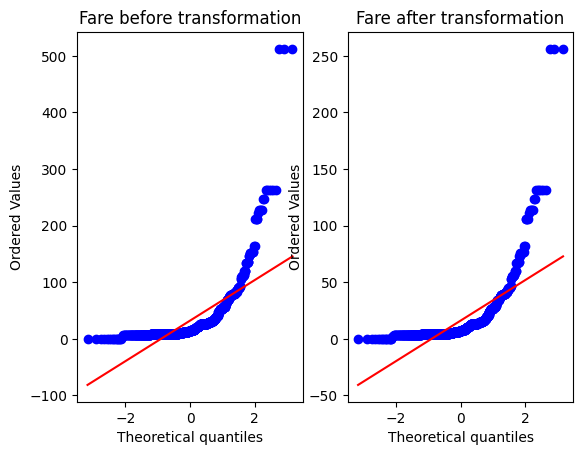

In [54]:
apply_transform(lambda x: x**1/2)

Accuracy LR :  0.61729088639201


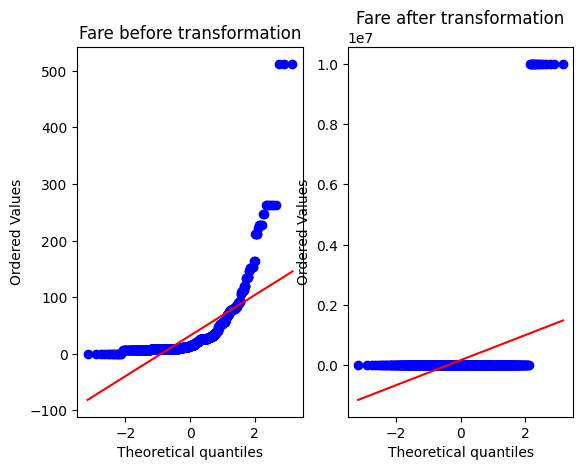

In [58]:
apply_transform(lambda x: 1/(x+0.0000001))